# Diamond Price Prediction (Regression with seaborn diamonds dataset)

#  1. Imports and Data Loading

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

### 🧩 Diamonds Dataset Overview

| Column | Description | Type | Example |
|:--------|:-------------|:------|:---------|
| **carat** | Weight of the diamond (1 carat = 0.2 grams) | float | 0.23 |
| **cut** | Quality of the cut | category | Ideal / Premium / Good / Very Good / Fair |
| **color** | Diamond color grade (from J = worst to D = best) | category | E |
| **clarity** | Measure of internal purity | category | VS1 / SI2 / IF / etc. |
| **depth** | Total depth % = (z / mean(x, y)) × 100 | float | 61.5 |
| **table** | Width of the top of the diamond relative to the widest point | float | 55 |
| **price** | Price in US dollars | int | 326 |
| **x** | Length (mm) | float | 3.95 |
| **y** | Width (mm) | float | 3.98 |
| **z** | Depth (mm) | float | 2.43 |


#  Load the diamonds dataset from seaborn

In [7]:
data = sns.load_dataset("diamonds")
print(data.head())
data.info()

   carat      cut color clarity  depth  table  price     x     y     z
0   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
1   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
2   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
3   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
4   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   carat    53940 non-null  float64 
 1   cut      53940 non-null  category
 2   color    53940 non-null  category
 3   clarity  53940 non-null  category
 4   depth    53940 non-null  float64 
 5   table    53940 non-null  float64 
 6   price    53940 non-null  int64   
 7   x        53940 non-null  float64 
 8   y        53940 non-null  float64 
 9   z        53940 non-null  float6

# 2. Data Cleaning and Feature Selection

In [8]:
# Drop rows with missing values (just in case)
data = data.dropna()
# Select a mix of numeric and categorical features
features = ['carat', 'depth', 'table', 'x', 'y', 'z', 'cut', 'color', 'clarity']
X = data[features]
y = data['price']
X.head()

,carat,depth,table,x,y,z,cut,color,clarity
0,0.23,61.5,55.0,3.95,3.98,2.43,Ideal,E,SI2
1,0.21,59.8,61.0,3.89,3.84,2.31,Premium,E,SI1
2,0.23,56.9,65.0,4.05,4.07,2.31,Good,E,VS1
3,0.29,62.4,58.0,4.20,4.23,2.63,Premium,I,VS2
4,0.31,63.3,58.0,4.34,4.35,2.75,Good,J,SI2


## Data Cleaning & Feature Selection

We select important features for regression, mixing numeric and categorical attributes.  
Categorical features are encoded using one-hot encoding.

# 3. Encode Categorical Variables

In [9]:
X_encoded = pd.get_dummies(X, columns=['cut', 'color', 'clarity'], drop_first=True)
X_encoded.head()

,carat,depth,table,x,y,z,cut_Premium,cut_Very Good,cut_Good,cut_Fair,...,color_H,color_I,color_J,clarity_VVS1,clarity_VVS2,clarity_VS1,clarity_VS2,clarity_SI1,clarity_SI2,clarity_I1
0,0.23,61.5,55.0,3.95,3.98,2.43,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
1,0.21,59.8,61.0,3.89,3.84,2.31,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
2,0.23,56.9,65.0,4.05,4.07,2.31,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,0.29,62.4,58.0,4.20,4.23,2.63,True,False,False,False,...,False,True,False,False,False,False,True,False,False,False
4,0.31,63.3,58.0,4.34,4.35,2.75,False,False,True,False,...,False,False,True,False,False,False,False,False,True,False


## Train/Test Split

Split data into training and test sets for unbiased model evaluation.


# 4. Train/Test Split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

## 5. Linear Regression Modeling

Fit a standard linear regression model and assess its performance using various metrics.


In [11]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

## 6. Residual Diagnostics

Visualizing residuals reveals bias or variance missed by the model.


In [13]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)
adj_r2 = 1 - (1-r2) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print(f"\nLinear Model: MAE={mae:.2f}, MSE={mse:.2f}, RMSE={rmse:.2f}, R²={r2:.2f}, Adjusted R²={adj_r2:.2f}")



Linear Model: MAE=737.15, MSE=1288705.48, RMSE=1135.21, R²=0.92, Adjusted R²=0.92


R
2
 : 0.92 (good fit)

Adjusted
$R^
2$ : 0.92 (good after adjusting for feature count)

## Polynomial Regression (Quadratic)

Polynomial regression introduces interaction/nonlinear effects.
For speed, we sample data since diamonds dataset is large.


# 7. Residual Plot (Linear Model)

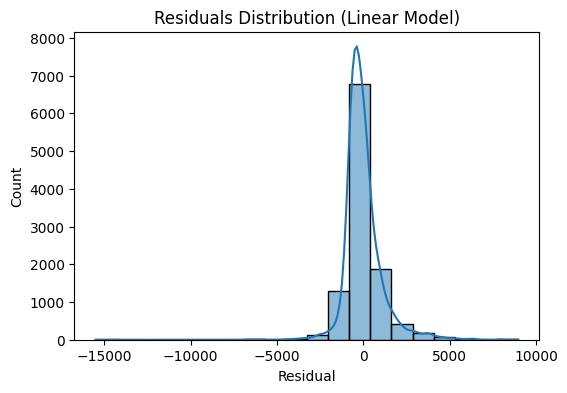

In [14]:
plt.figure(figsize=(6,4))
sns.histplot(y_test - y_pred, bins=20, kde=True)
plt.title('Residuals Distribution (Linear Model)')
plt.xlabel('Residual')
plt.show()

## Residual Diagnostics: Polynomial Model


# 8. Polynomial Features (Quadratic)

In [16]:
# (For computational speed, downsample as diamonds is a large dataset)
X_train_sample = X_train.sample(n=5000, random_state=42)
y_train_sample = y_train.loc[X_train_sample.index]
X_test_sample = X_test.sample(n=1000, random_state=42)
y_test_sample = y_test.loc[X_test_sample.index]

poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly_train = poly.fit_transform(X_train_sample)
X_poly_test = poly.transform(X_test_sample)

lr_poly = LinearRegression()
lr_poly.fit(X_poly_train, y_train_sample)
y_poly_pred = lr_poly.predict(X_poly_test)

## Cross-Validation

We use KFold cross-validation to check how well the model generalizes.


In [17]:
# ## 9. Polynomial Model Evaluation
mae_poly = mean_absolute_error(y_test_sample, y_poly_pred)
mse_poly = mean_squared_error(y_test_sample, y_poly_pred)
rmse_poly = np.sqrt(mean_squared_error(y_test_sample, y_poly_pred))
r2_poly = r2_score(y_test_sample, y_poly_pred)
adj_r2_poly = 1 - (1-r2_poly) * (len(y_test_sample)-1)/(len(y_test_sample)-X_poly_test.shape[1]-1)
print(f"\nPolynomial Model: MAE={mae_poly:.2f}, MSE={mse_poly:.2f}, RMSE={rmse_poly:.2f}, R²={r2_poly:.2f}, Adjusted R²={adj_r2_poly:.2f}")

# Linear Model: MAE=737.15, MSE=1288705.48, RMSE=1135.21, R²=0.92, Adjusted R²=0.92


Polynomial Model: MAE=450.90, MSE=1888592.83, RMSE=1374.26, R²=0.88, Adjusted R²=0.83


Higher MSE :It likely means that while the model fits the majority of data well, there are some predicted values which are far from actuals (large outliers), inflating the MSE.

Check individual error plots (residual plots) to confirm if a few points are causing this increase.

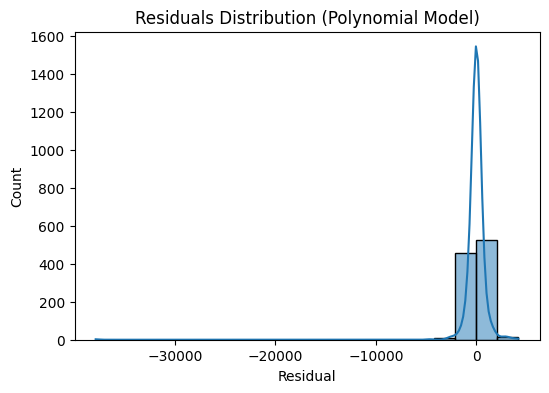

In [18]:
plt.figure(figsize=(6,4))
sns.histplot(y_test_sample - y_poly_pred, bins=20, kde=True)
plt.title('Residuals Distribution (Polynomial Model)')
plt.xlabel('Residual')
plt.show()

Here, we can see we have many outliers on the negative side of the graph.Which is the cause for increase in MSE of Polynomial Model.

## Most Important Features

Top coefficients from polynomial regression (highest absolute effect on diamond price).


In [19]:
# ## 10. K-Fold Cross-Validation (Polynomial)
kf = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(lr, X_encoded, y, cv=kf, scoring='r2')
print(f"\nCV R² scores: {cv_scores}")
print(f"Mean CV R²: {cv_scores.mean():.2f}")


CV R² scores: [0.91893314 0.92224842 0.91409925 0.91960294 0.92314319]
Mean CV R²: 0.92


In [20]:
# ## 11. Model Interpretation: Top Features
coef_names = poly.get_feature_names_out(X_train_sample.columns)
coefs_df = pd.DataFrame({'Feature': coef_names, 'Coef': lr_poly.coef_})
print("\nTop predictive features (Polynomial Model):")
print(coefs_df.reindex(coefs_df['Coef'].abs().sort_values(ascending=False).index).head(10))


Top predictive features (Polynomial Model):
          Feature           Coef
5               z  206693.958379
4               y  -77909.759213
3               x  -60817.966504
298  clarity_I1^2   36817.742950
22     clarity_I1   36817.742950
0           carat  -31231.511875
15        color_J   15907.212018
263     color_J^2   15907.212018
1           depth  -15249.814792
26        carat x  -13877.874208


Dimensional features (x, y, z) have the strongest influence, both positive and negative, aligning with expectations for diamond pricing.

Categorical features such as clarity and color—especially specific grades and their quadratic terms—play notable roles, possibly highlighting outlier effects or nonlinear relationships.

Polynomial terms (like clarity_I1^2, color_J^2) and feature interactions (like carat x) help capture complex, nonlinear influences that standard linear models would miss.

# Bias Variance Trade-Off

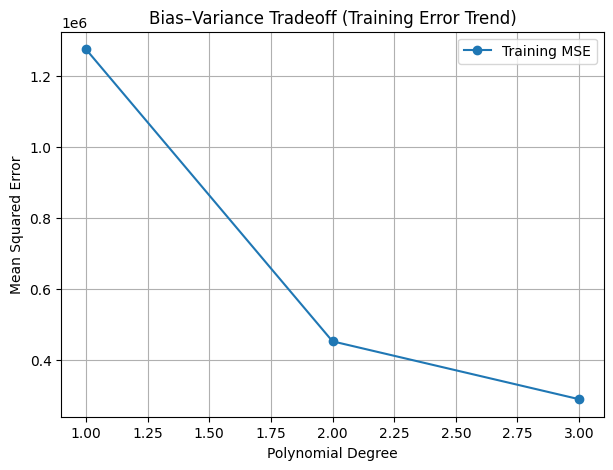

In [21]:
train_errors = []
for d in range(1, 4):
    poly = PolynomialFeatures(degree=d)
    X_poly = poly.fit_transform(X_encoded)
    model = LinearRegression().fit(X_poly, y)
    mse = mean_squared_error(y, model.predict(X_poly))
    train_errors.append(mse)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 4), train_errors, marker='o', label='Training MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff (Training Error Trend)")
plt.grid(True)
plt.legend()
plt.show()

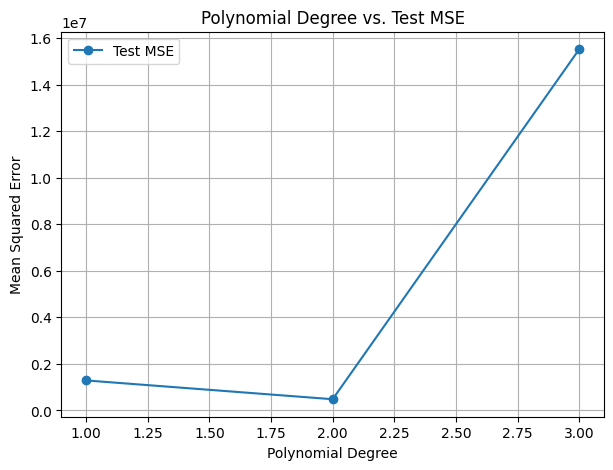

In [22]:
test_errors = []
for d in range(1, 4):
    poly = PolynomialFeatures(degree=d)
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_poly_train, y_train)

    y_test_pred = model.predict(X_poly_test)
    mse = mean_squared_error(y_test, y_test_pred)
    test_errors.append(mse)

plt.figure(figsize=(7, 5))
plt.plot(range(1, 4), test_errors, marker='o', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Polynomial Degree vs. Test MSE")
plt.grid(True)
plt.legend()
plt.show()

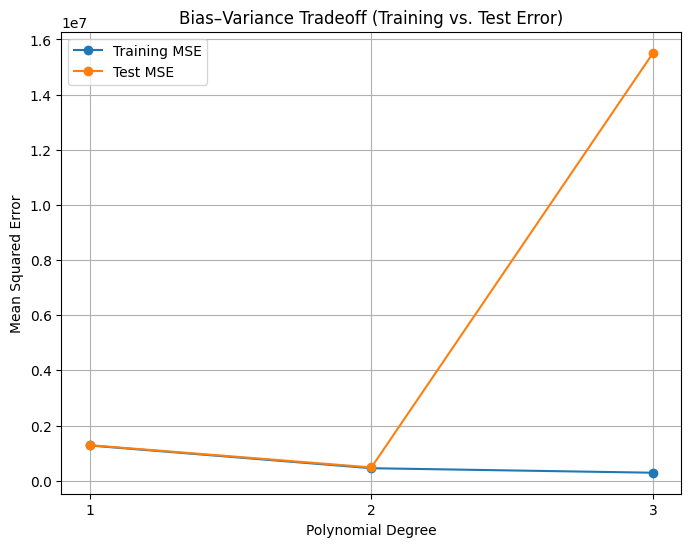

In [ ]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 4), train_errors, marker='o', label='Training MSE')
plt.plot(range(1, 4), test_errors, marker='o', label='Test MSE')
plt.xlabel("Polynomial Degree")
plt.ylabel("Mean Squared Error")
plt.title("Bias–Variance Tradeoff (Training vs. Test Error)")
plt.xticks(range(1, 4))
plt.grid(True)
plt.legend()
plt.show()



- **Training MSE** decreases with higher polynomial degrees, indicating better data fit.
- **Test MSE** is minimized at degree 2, rises  at degree 3, signaling overfitting.
- **Degree 2** polynomial model provides the best generalization for diamond price prediction.
- This analysis helps select model complexity that avoids both underfitting and overfitting.
